In [5]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils.np_utils import to_categorical
from scipy import misc
import os

savepath = 'train.h5'
size_input = 33
size_label = 21
scale = 3
stride = 14

/Users/xly/miniconda3/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:44: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(21712, 33, 33)
(21712, 21, 21)
<class 'numpy.ndarray'>


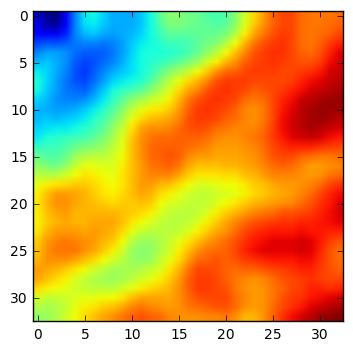

In [112]:
#def load_images(paths):
#    images = [img_to_array(load_img(path, target_size=(224, 224)))
#              for path in paths]
#    return preprocess_input(np.stack(images))

def modcrop(imgs, modulo):
    sz = img.shape
    sz = (sz[0] - sz[0] % modulo, sz[1] - sz[1] % modulo)
    imgs = imgs[0 : sz[0], 0 : sz[1]]
    return imgs

def rgb2ycbcr(img):
    img_ycbcr = img
    img_ycbcr[:, : ,0] = 16 + (65.481 * img[:, :, 0] + 128.553 * img[:, :, 1] + 24.966 * img[:, :, 2]) / 255.0
    img_ycbcr[:, : ,1] = 128 + (-37.797 * img[:, :, 0] - 74.203 * img[:, :, 1] + 112.0 * img[:, :, 2]) / 255.0
    img_ycbcr[:, : ,2] = 128 + (112.0 * img[:, :, 0] - 93.786 * img[:, :, 1] -18.214 * img[:, :, 2]) / 255.0
    return img_ycbcr

padding = abs(size_input - size_label) / 2
count = 0
#repo_path = Path(__file__).resolve().parents[2]
image_paths = list(Path('Train').glob('*.bmp'))
subim_input = []
subim_label = []
for path in image_paths:
    img = img_to_array(load_img(path))
    img = rgb2ycbcr(img)
    img = img[:, :, 0]
    #plt.imshow(img)
    #plt.show()
    im_label = modcrop(img, 3)
    hei = im_label.shape[0]
    wid = im_label.shape[1]
    im_label = np.array(im_label, dtype=np.uint8)
    im_input_tmp = misc.imresize(im_label, 1 / scale, interp='bicubic')
    im_input = misc.imresize(im_input_tmp, (hei, wid), interp='bicubic')
    
    subim_input = subim_input + [im_input[x : x + size_input, y : y + size_input]
                   for x in range(0, hei - size_input, stride)
                   for y in range(0, wid - size_input, stride)]
    subim_label = subim_label + [im_label[x + padding : x + padding + size_label,
                           y + padding : y + padding + size_label]
                   for x in range(0, hei - size_input, stride)
                   for y in range(0, wid - size_input, stride)]
    
data_train = np.stack(subim_input)
label_train = np.stack(subim_label)

print(data_train.shape)
print(label_train.shape)
print(type(data_train))
plt.imshow(data_train[1, :, :])
plt.show()